In [30]:
!pip install colorspacious

In [3]:
# sphinx_gallery_thumbnail_number = 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

In [4]:

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [5]:
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot_r', 'afmhot', 'gist_heat', 'copper']

In [6]:
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [7]:
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

In [8]:
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

In [9]:
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

ValueError: Colormap twilight is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

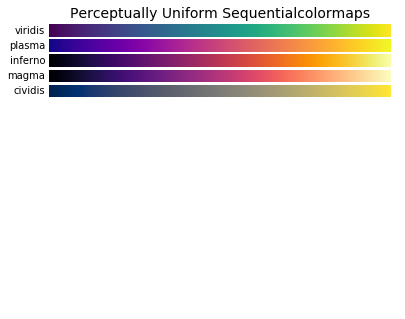

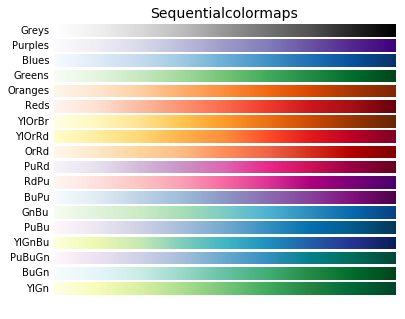

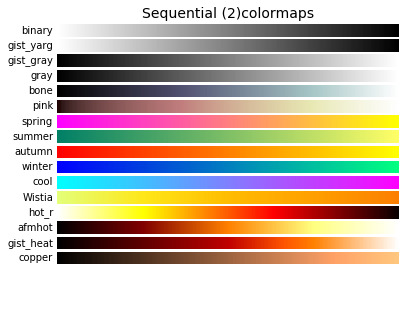

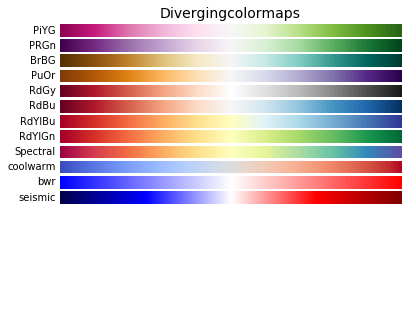

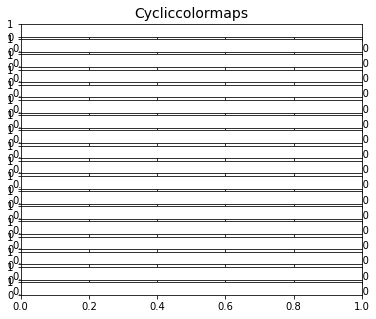

In [10]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + 'colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [ ]:
import numpy as np
import os
from PIL import Image

class ColorBlindConverter(object):

    def __init__(self, inputimage):
        self.powGammaLookup = np.power(np.linspace(0,256,256)/256, 2.2)
        self.conversion_coeffs = {
            'p': {'cpu': 0.753, 'cpv':  0.265, 'am': 1.273463, 'ayi': -0.073894},
            'd': {'cpu': 1.140, 'cpv': -0.140, 'am': 0.968437, 'ayi':  0.003331},
            't': {'cpu': 0.171, 'cpv': -0.003, 'am': 0.062921, 'ayi':  0.292119}}
        self.image = Image.open(inputimage)
        self.image_orig = self.image
        self.infilename = inputimage
        self.prefix = os.path.splitext(inputimage)[0]
        self.suffix = ''
        self.extension = os.path.splitext(inputimage)[1]

        self.width, self.height = self.image.size

    def _inversePow(self, x):
        return int(255.0 * float(0 if x <= 0 else (1 if x >= 1 else np.power(x, 1/2.2))))

    def convert(self, cb_type):
        self.cb_type = cb_type
        self.image = self.image_orig
        print('Converting {:} to vision type: {:}.'.format(self.infilename, self.cb_type))
        if(   self.cb_type == 'Normal'):
            self._convert_normal()
        if(   self.cb_type == 'Protanopia' or
              self.cb_type == 'Deuteranopia' or
              self.cb_type == 'Tritanopia'):
            self._convert_colorblind()
        elif( self.cb_type == 'Protanomaly' or
              self.cb_type == 'Deuteranomaly' or
              self.cb_type == 'Tritanomaly'):
            self._convert_colorblind()
            self._convert_anomylize()
        elif( self.cb_type == 'Monochromacy'):
            self._convert_monochrome()
        self.suffix = self.cb_type
        return

    def _convert_normal(self):
        self.image = self.image
        return

    def _convert_colorblind(self):
        gamma = 2.2;
        wx = 0.312713;
        wy = 0.329016;
        wz = 0.358271;

        cpu = self.conversion_coeffs[self.cb_type[0].lower()]['cpu']
        cpv = self.conversion_coeffs[self.cb_type[0].lower()]['cpv']
        am  = self.conversion_coeffs[self.cb_type[0].lower()]['am']
        ayi = self.conversion_coeffs[self.cb_type[0].lower()]['ayi']

        image_new = Image.new("RGB", (self.width, self.height), "white")
        p_new = image_new.load()
        for i in range(self.width):
            for j in range(self.height):
                p_old = self.image.getpixel((i,j))
                r = p_old[0]
                g = p_old[1]
                b = p_old[2]

                cr = self.powGammaLookup[r]
                cg = self.powGammaLookup[g]
                cb = self.powGammaLookup[b]

                # rgb -> xyz
                cx = (0.430574 * cr + 0.341550 * cg + 0.178325 * cb)
                cy = (0.222015 * cr + 0.706655 * cg + 0.071330 * cb)
                cz = (0.020183 * cr + 0.129553 * cg + 0.939180 * cb)

                sum_xyz = cx + cy + cz
                cu = 0
                cv = 0

                if(sum_xyz != 0):
                    cu = cx / sum_xyz
                    cv = cy / sum_xyz

                nx = wx * cy / wy
                nz = wz * cy / wy
                clm = 0
                dy = 0

                if(cu < cpu):
                    clm = (cpv - cv) / (cpu - cu)
                else:
                    clm = (cv - cpv) / (cu - cpu)

                clyi = cv - cu * clm
                du = (ayi - clyi) / (clm - am)
                dv = (clm * du) + clyi

                sx = du * cy / dv
                sy = cy
                sz = (1 - (du + dv)) * cy / dv

                # xyz->rgb
                sr =  (3.063218 * sx - 1.393325 * sy - 0.475802 * sz)
                sg = (-0.969243 * sx + 1.875966 * sy + 0.041555 * sz)
                sb =  (0.067871 * sx - 0.228834 * sy + 1.069251 * sz)

                dx = nx - sx
                dz = nz - sz

                # xyz->rgb

                dr =  (3.063218 * dx - 1.393325 * dy - 0.475802 * dz)
                dg = (-0.969243 * dx + 1.875966 * dy + 0.041555 * dz)
                db =  (0.067871 * dx - 0.228834 * dy + 1.069251 * dz)

                adjr = ((0 if sr < 0 else 1) - sr) / dr if dr > 0 else 0
                adjg = ((0 if sg < 0 else 1) - sg) / dg if dg > 0 else 0
                adjb = ((0 if sb < 0 else 1) - sb) / db if db > 0 else 0

                adjust = max([
                    0 if (adjr > 1 or adjr < 0) else adjr,
                    0 if (adjg > 1 or adjg < 0) else adjg,
                    0 if (adjb > 1 or adjb < 0) else adjb])

                sr = sr + (adjust * dr)
                sg = sg + (adjust * dg)
                sb = sb + (adjust * db)

                p_new[i,j] = (self._inversePow(sr),
                              self._inversePow(sg),
                              self._inversePow(sb))

        self.image = image_new

        return self.image

    def _convert_anomylize(self):
        v = 1.75
        d = v + 1
        image_new = Image.new("RGB", (self.width, self.height), "white")
        p_new = image_new.load()
        for i in range(self.width):
            for j in range(self.height):
                p_orig = self.image_orig.getpixel((i,j))
                r_orig = p_orig[0]
                g_orig = p_orig[1]
                b_orig = p_orig[2]
                p_cb = self.image.getpixel((i,j))
                r_cb = p_cb[0]
                g_cb = p_cb[1]
                b_cb = p_cb[2]

                r_new = (v * r_cb + r_orig) / d
                g_new = (v * g_cb + g_orig) / d
                b_new = (v * b_cb + b_orig) / d

                p_new[i,j] = (int(r_new), int(g_new), int(b_new))

        self.image = image_new

        return self.image

    def _convert_monochrome(self):
        image_new = Image.new("RGB", (self.width, self.height), "white")
        p_new = image_new.load()
        for i in range(self.width):
            for j in range(self.height):
                p_old = self.image.getpixel((i,j))
                r_old = p_old[0]
                g_old = p_old[1]
                b_old = p_old[2]
                g_new = (r_old * 0.299) + (g_old * 0.587) + (b_old * 0.114)
                p_new[i,j] = (int(g_new), int(g_new), int(g_new))
        self.image = image_new
        return

    def writeImage(self):
        outfilename = '{:}_{:}{:}'.format(self.prefix, self.suffix, self.extension)
        self.image.save(outfilename)
        return

import __main__ as main
if(__name__ == '__main__' and hasattr(main, '__file__')):

    ############################################################
    # Command line parsing.
    ############################################################

    import argparse
    import os
    import textwrap

    cb_types = {
        'Normal': '(normal vision)',
        'Protanopia': '(red-blind)',
        'Deuteranopia': '(green-blind)',
        'Tritanopia': '(blue-blind)',
        'Protanomaly': '(red-weak)',
        'Deuteranomaly': '(green-weak)',
        'Tritanomaly': '(blue-weak)',
        'Monochromacy': '(totally colorblind)'
    }
    description = textwrap.dedent(
    """
    This script is used to convert "normally" colored images to a representation
    similar to what a colorblind viewer might see.   The types of colorblindness
    that can be simulated are:
    """ + '    '.join(['* {:} {:}\n'.format(k,v) for k,v in cb_types.items()]) +

    """
    with the default action to convert to 'All' types of colorblindness (and to
    a normal vision version).  Converting to only a select type of
    colorblindness can be accomplished with the CB parameter described below.
    The conversion processes and coefficients herein are used with permission
    from Colblindor [http://www.color-blindness.com/] and were therein used with
    permission of Matthew Wickline and the Human-Computer Interaction Resource
    Network [http://www.hcirn.com/] for non-commercial purposes.  As such, this
    code may only be used for non-commercial purposes.
    """)

    epilog = textwrap.dedent(
    """
    Typical command line calls might look like:
    > python """ + os.path.basename(__file__) + """ <inputimage>
    """ + u"\u2063")

    parser = argparse.ArgumentParser(
        formatter_class=argparse.RawDescriptionHelpFormatter,
        description=description, epilog=epilog)

    # Add required, positional, arguments.
    parser.add_argument(
        'inputimage', type = str,
        help = 'input image file name')

    # Add optional, named, arguments.
    parser.add_argument(
        '--cb', type = str, default = 'All',
        help = 'type of colorblindness to convert to (default: All)')

    args = parser.parse_args()

    # Basic error checking of command line options.
    assert(os.path.isfile(args.inputimage)), \
        'Input image (' + args.inputimage + ') not found.'

    ############################################################
    # Program execution.
    ############################################################

    image = ColorBlindConverter(args.inputimage)
    if(args.cb == 'All'):
        image.convert('Normal')
        image.writeImage()
        image.convert('Monochromacy')
        image.writeImage()
        image.convert('Protanopia')
        image.writeImage()
        image.convert('Deuteranopia')
        image.writeImage()
        image.convert('Tritanopia')
        image.writeImage()
        image.convert('Protanomaly')
        image.writeImage()
        image.convert('Deuteranomaly')
        image.writeImage()
        image.convert('Tritanomaly')
        image.writeImage()
    else:
        if(args.cb in cb_types.keys()):
            image.convert(args.cb)
            image.writeImage()
        else:
            print('Cannot find colorblindness type: {:}.'.format(args.cb))
            print('For valid conversion types, see --help.')
            print('Exiting.')


In [ ]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axes = plt.subplots(nrows=nsubplots, squeeze=False,
                             figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axes.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # http://stackoverflow.com/questions/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axes[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)
    fig.text(0.0, 0.55, 'Lightness $L^*$', fontsize=12,
             transform=fig.transFigure, rotation=90)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

In [2]:
! pip install holoviews

     |████████████████████████████████| 4.0MB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 6.9MB/s eta 0:00:011


In [4]:
! pip install colorcet

     |████████████████████████████████| 1.6MB 1.9MB/s eta 0:00:01


In [8]:
import holoviews as hv
import colorcet as cc
from colorcet.plotting import swatches, sine_combs
from colorspacious import cspace_convert
hv.notebook_extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .Jet.I     :Image   [x,y]   (z)
   .Rainbow.I :Image   [x,y]   (z)
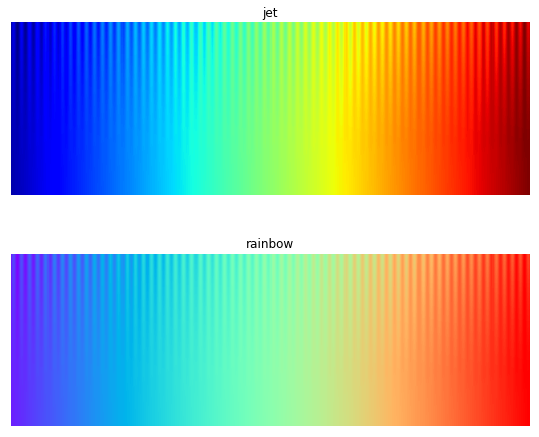

In [12]:
sine_combs(("jet", "jet"),('rainbow', 'rainbow'))


:Layout
   .Fire_comma_CET_L3_comma_linear_kryw_0_100_c71.I :Image   [x,y]   (z)
   .Rainbow_comma_rainbow_bgyr_35_85_c73.I          :Image   [x,y]   (z)
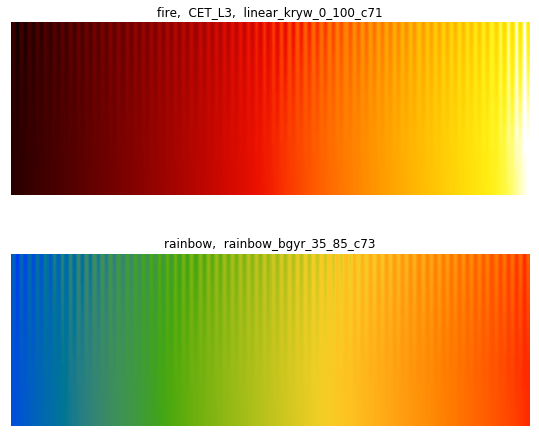

In [18]:
sine_combs("fire", "rainbow")


:Layout
   .CET_C5_comma_cyclic_grey_15_85_c0.I                                        :Image   [x,y]   (z)
   .CET_C5s_comma_cyclic_grey_15_85_c0_s25.I                                   :Image   [x,y]   (z)
   .CET_C1_comma_cyclic_mrybm_35_75_c68.I                                      :Image   [x,y]   (z)
   .CET_C1s_comma_cyclic_mrybm_35_75_c68_s25.I                                 :Image   [x,y]   (z)
   .CET_C2_comma_cyclic_mygbm_30_95_c78.I                                      :Image   [x,y]   (z)
   .Colorwheel_comma_CET_C2s_comma_cyclic_mygbm_30_95_c78_s25.I                :Image   [x,y]   (z)
   .CET_CBC1_comma_cyclic_protanopic_deuteranopic_bwyk_16_96_c31.I             :Image   [x,y]   (z)
   .CET_CBC2_comma_cyclic_protanopic_deuteranopic_wywb_55_96_c33.I             :Image   [x,y]   (z)
   .CET_CBTC1_comma_cyclic_tritanopic_cwrk_40_100_c20.I                        :Image   [x,y]   (z)
   .CET_CBTC2_comma_cyclic_tritanopic_wrwc_70_100_c20.I                        :Image   [x,y]   (z)
   .CET_C4_comma_cyclic_wrwbw_40_90_c42.I                                      :Image   [x,y]   (z)
   .CET_C4s_comma_cyclic_wrwbw_40_90_c42_s25.I                                 :Image   [x,y]   (z)
   .Bkr_comma_CET_D4_comma_diverging_bkr_55_10_c35.I                           :Image   [x,y]   (z)
   .Bky_comma_CET_D6_comma_diverging_bky_60_10_c30.I                           :Image   [x,y]   (z)
   .CET_D13_comma_diverging_bwg_20_95_c41.I                                    :Image   [x,y]   (z)
   .CET_D1A_comma_diverging_bwr_20_95_c54.I                                    :Image   [x,y]   (z)
   .Coolwarm_comma_CET_D1_comma_diverging_bwr_40_95_c42.I                      :Image   [x,y]   (z)
   .CET_D9_comma_diverging_bwr_55_98_c37.I                                     :Image   [x,y]   (z)
   .CET_D10_comma_diverging_cwm_80_100_c22.I                                   :Image   [x,y]   (z)
   .Diverging_gkr_60_10_c40.I                                                  :Image   [x,y]   (z)
   .CET_D3_comma_diverging_gwr_55_95_c38.I                                     :Image   [x,y]   (z)
   .Gwv_comma_CET_D2_comma_diverging_gwv_55_95_c39.I                           :Image   [x,y]   (z)
   .CET_D12_comma_diverging_isoluminant_cjm_75_c23.I                           :Image   [x,y]   (z)
   .Diverging_isoluminant_cjm_75_c24.I                                         :Image   [x,y]   (z)
   .CET_D11_comma_diverging_isoluminant_cjo_70_c25.I                           :Image   [x,y]   (z)
   .CET_D8_comma_diverging_linear_bjr_30_55_c53.I                              :Image   [x,y]   (z)
   .Bjy_comma_CET_D7_comma_diverging_linear_bjy_30_90_c45.I                    :Image   [x,y]   (z)
   .Bwy_comma_CET_CBD1_comma_diverging_protanopic_deuteranopic_bwy_60_95_c32.I :Image   [x,y]   (z)
   .CET_R3_comma_diverging_rainbow_bgymr_45_85_c67.I                           :Image   [x,y]   (z)
   .Cwr_comma_CET_CBTD1_comma_diverging_tritanopic_cwr_75_98_c20.I             :Image   [x,y]   (z)
   .CET_I1_comma_isoluminant_cgo_70_c39.I                                      :Image   [x,y]   (z)
   .Isolum_comma_CET_I2_comma_isoluminant_cgo_80_c38.I                         :Image   [x,y]   (z)
   .CET_I3_comma_isoluminant_cm_70_c39.I                                       :Image   [x,y]   (z)
   .Bgy_comma_linear_bgy_10_95_c74.I                                           :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c67.I                                                   :Image   [x,y]   (z)
   .Bgyw_comma_linear_bgyw_15_100_c68.I                                        :Image   [x,y]   (z)
   .CET_L9_comma_linear_bgyw_20_98_c66.I                                       :Image   [x,y]   (z)
   .Kbc_comma_linear_blue_5_95_c73_comma_CET_L6_comma_linear_kbc_5_95_c73.I    :Image   [x,y]   (z)
   .Blues_comma_CET_L12_comma_linear_blue_95_50_c20.I                          :Image   [x,y]   (z)
   .CET_L7_comma_linear_bmw_5_95_c86.I                                         :Image   [x,y
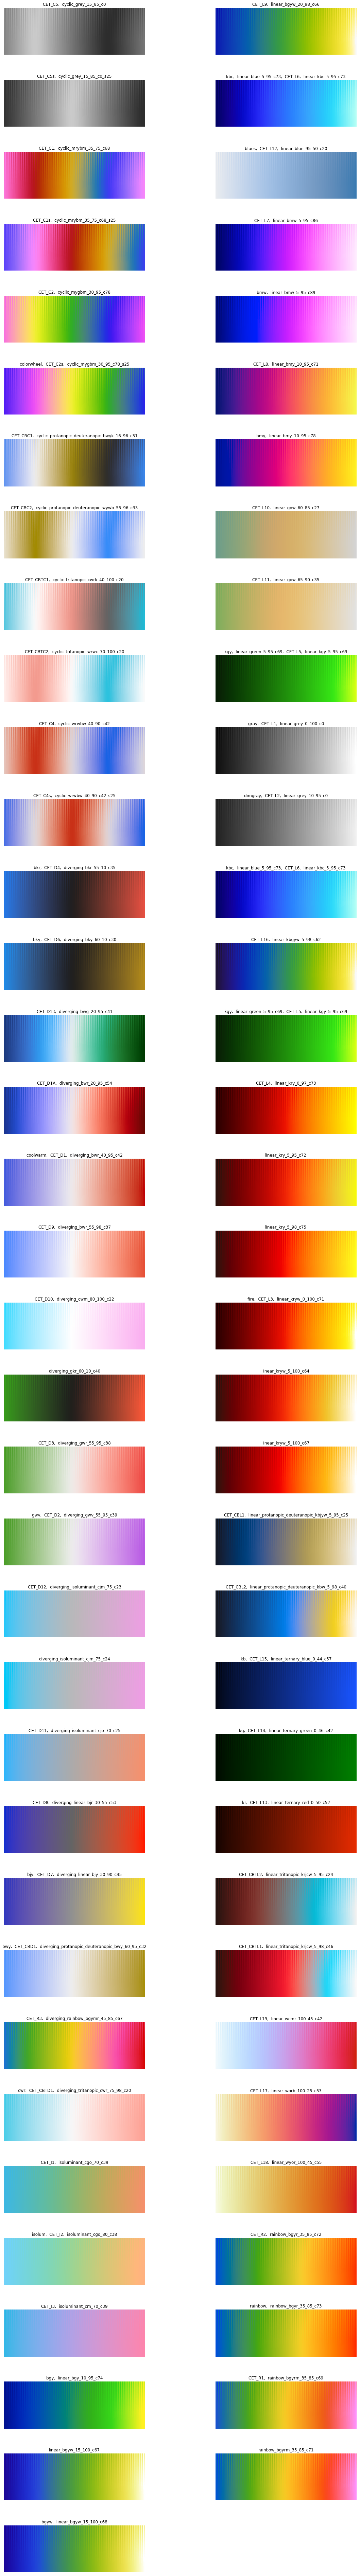

In [19]:
sine_combs(not_group='glasbey', cols=2)


In [23]:
from colorcet.plotting import swatch, swatches, candy_buttons

import holoviews as hv


:Image   [x,y]   (z)
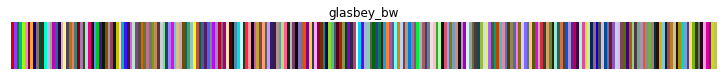

In [24]:
swatch("glasbey_bw")


:Layout
   .Glasbey_warm_comma_glasbey_bw_minc_20_hue_330_100.I :Image   [x,y]   (z)
   .Glasbey_cool_comma_glasbey_bw_minc_20_hue_150_280.I :Image   [x,y]   (z)
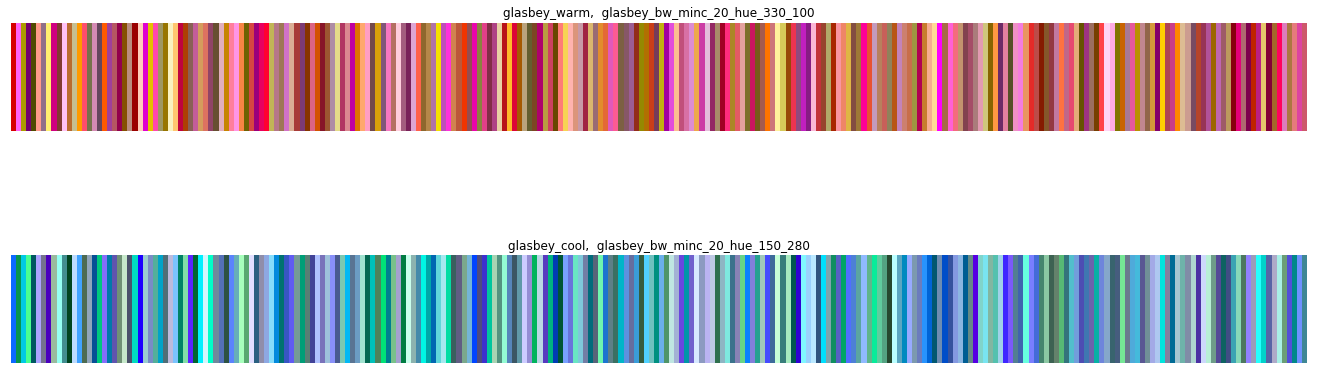

In [29]:
swatches("glasbey_bw_minc_20_hue_330_100", "glasbey_bw_minc_20_hue_150_280")
